In [1]:
from PIL import Image

from matplotlib import pyplot as plt
import matplotlib.image

import numpy as np

In [2]:
import os
# prepering directories
path = os.getcwd()
# subfolders
input_dir = os.path.join(path, 'data')
output_dir = os.path.join(path, 'outputs')


A histogram is basically used to represent data provided in a form of some groups. <br>
It is accurate method for the graphical representation of numerical data distribution.<br>
It is a type of bar plot where X-axis represents the bin ranges while   <br>
Y-axis gives information about frequency.<br>
Source: [LINK](https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/)

The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form.<br>
Source: [Link](https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch9/histo/5214822-eng.htm)

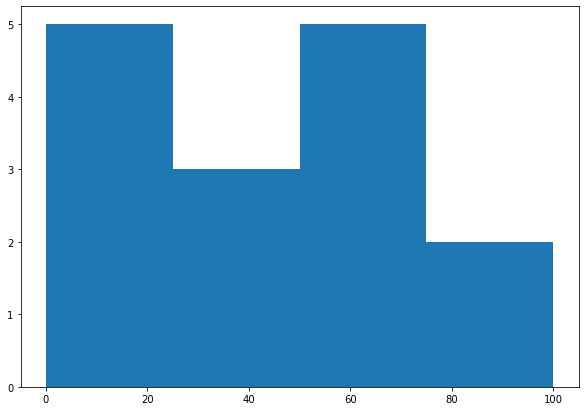

In [3]:
# Histogram with bins
# Creating dataset
a = np.array([22, 87, 5, 43, 56,73, 55, 54, 11,20, 51, 5, 79, 31,27])

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(a, bins = [0, 25, 50, 75, 100]) # bins are optional

# Show plot
plt.show()


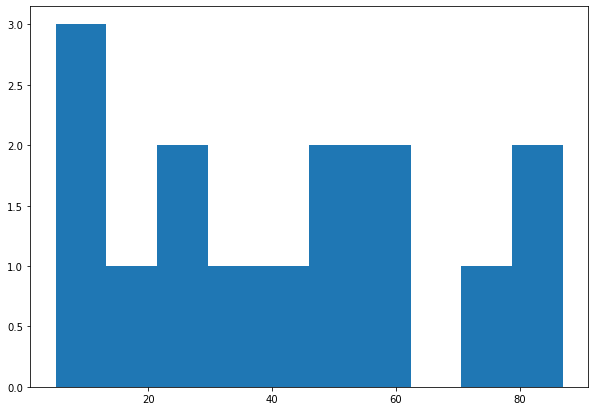

In [4]:
# Histogram without bins
# Creating dataset
a = np.array([22, 87, 5, 43, 56,73, 55, 54, 11,20, 51, 5, 79, 31,27])

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(a) # bins are optional

# Show plot
plt.show()


##  Pepe -  grayscale histogram

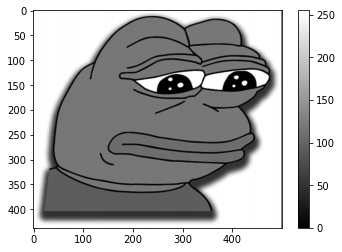

In [5]:
# Open image with Pilllow
image = Image.open(os.path.join(input_dir, 'sad-pepe.jfif'))

# converts image to the grayscale
img = image.convert('L')

# convert image to the numpy array 2D
img_numpy = np.array(img)

plt.imshow(img_numpy, cmap='gray', vmin=img_numpy.min(), vmax=img_numpy.max())
plt.colorbar()
plt.show()

#### 'Flattening' 2D numpy array into 1D using np.flatten() 

In [6]:
flat = img_numpy.flatten()
flat

array([254, 254, 254, ..., 254, 255,   0], dtype=uint8)

#### Creating basic histogram

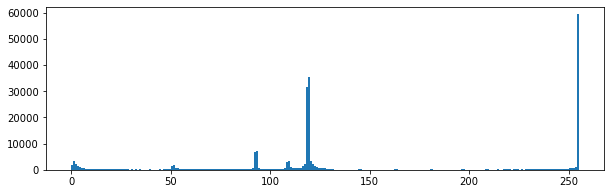

In [7]:
# Creating histogram
bins = np.arange(256)

fig, ax = plt.subplots(figsize =(10, 3))
ax.hist(flat, bins) # bins are optional

# Show plot
plt.show()

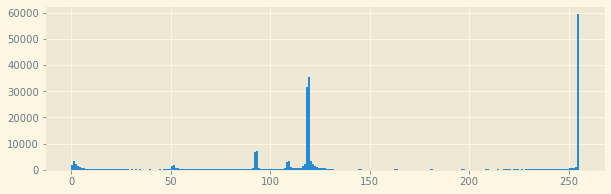

In [8]:
%matplotlib inline
plt.style.use("Solarize_Light2") # adding style to the histogram 

bins = np.arange(256)

fig, ax = plt.subplots(figsize =(10, 3))
ax.hist(flat, bins) # bins are optional

# Show plot
plt.show()

#### Histogram with a colorbar in grayscale

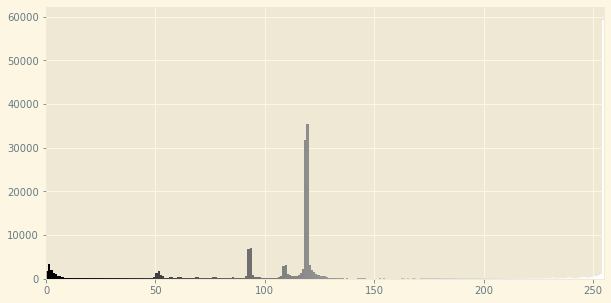

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
n,bins,patches = ax.hist(flat, bins=range(256), edgecolor='none')
ax.set_xlim(0,255)

cm = plt.cm.get_cmap('Greys_r')
norm = matplotlib.colors.Normalize(vmin=bins.min(), vmax=bins.max())
for b,p in zip(bins,patches):
    p.set_facecolor(cm(norm(b)))

plt.show()

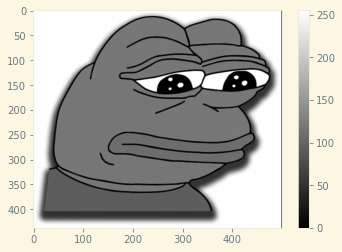

In [10]:
plt.imshow(img_numpy, cmap='gray', vmin=img_numpy.min(), vmax=img_numpy.max())
plt.grid(b=None)
plt.colorbar()
plt.show()

### RGB - Sad Pepe

In [11]:
# this is done with Pillow
data = image.getdata()

# splitting PNG into 3  bands
r = [(d[0], 0, 0) for d in data]
g = [(0, d[1], 0) for d in data]
b = [(0, 0, d[2]) for d in data]

In [12]:
# Saving data to JPGs
image.putdata(r)
image.save(os.path.join(output_dir, 'r.jpg'))
image.putdata(g)
image.save(os.path.join(output_dir, 'g.jpg'))
image.putdata(b)
image.save(os.path.join(output_dir, 'b.jpg'))

In [13]:
# Data preperation for ploting RGB histograms
# r to flatten array
r = np.array(r)
r = r.flatten()

# g to flatten array
g = np.array(g)
g = g.flatten()

# b to flatten array
b = np.array(b)
b = b.flatten()

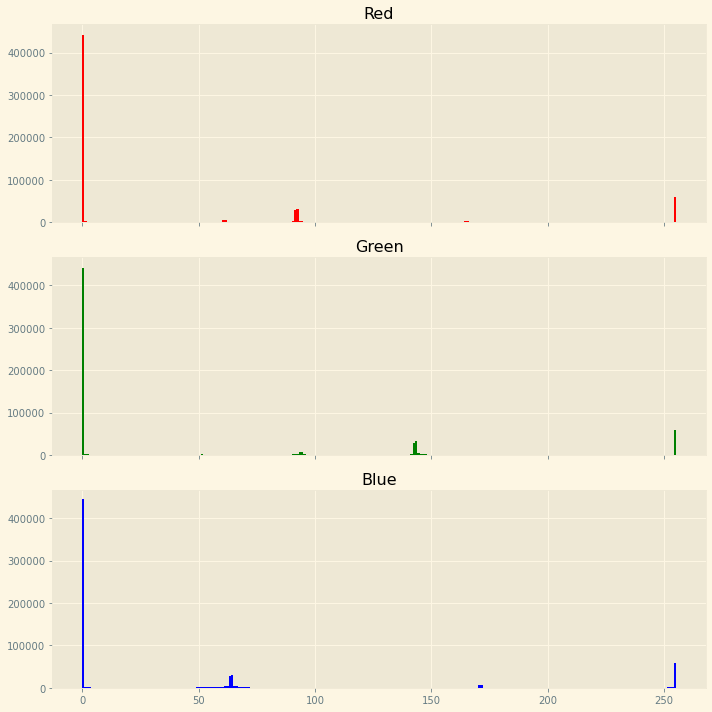

In [22]:
# Creating histogram
bins = np.arange(256)

fig, axs = plt.subplots(3, 1, sharex=True, sharey=True, figsize =(10, 10))
axs[0].hist(r, bins, color='r') # bins are optional
axs[1].hist(g, bins, color='g') # bins are optional
axs[2].hist(b, bins, color='b') # bins are optional

# Show plot
axs[0].set_title("Red")
axs[1].set_title("Green")
axs[2].set_title("Blue")

fig.tight_layout()
plt.show()